In [1]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1920,
        'height': 1080,
        'scroll': True,
})

{'width': 1920, 'height': 1080, 'scroll': True}

# Equations of State — Introduction

## Motivation

Over the next several lectures we will explore another major component of stellar microphysics: the **equation of state (EOS)**. In general, the EOS specifies the pressure as a function of density, temperature, and composition:

$$
P = P(\rho, T, X_i)
$$

Its most direct appearance in stellar structure is through the equation of hydrostatic equilibrium:

$$
\frac{dP}{dr} = -\rho \frac{G M(r)}{r^2}
$$

But the EOS also determines important microscopic properties of stellar matter, such as the ionization fraction, which strongly affects energy transport.

---

## Equilibrium Assumptions

Throughout this discussion we assume local equilibrium, including:
- Pressure equilibrium  
- Thermal equilibrium  
- Ionization equilibrium  

We explicitly *do not* assume nuclear equilibrium, since that would preclude fusion. Nuclear reactions are typically slow compared to microscopic equilibration processes.

The following discussions of EoS are made using an assumption that the radiation, gas, solid, material, is in a state of local thermodynamic equilibrium (LTE).

Some definitions:

The pressure scale height is defined as

$$
\lambda_{\rm{P}} = \left(\frac{\textup{d} ln P}{dr}\right)^{-1} \equiv \frac{P}{g\rho}
$$

where we used the equation of HSE to simplify. Also, sometimes the pressure scale height is defined as $H_{\rm{P}}$ with value of order unity in the constant-density model. 


Consider also the mean free path $\lambda_{\rm{phot}}$ of a photon, or the distance traveled by a photon before it is either absorbed or scattered in a new direction:

photon mean free path

$$
\lambda_{\rm{phot}} = (\kappa \rho)^{-1} ~ (\rm{cm})
$$

We can use an estimate with the electron opacity of $\kappa\approx1 \ \rm{cm}^{2} \ \rm{g}^{-1}$ and average density of about 1 $\rm{g} \ \rm{cm}^{-3}$, we find that $\lambda_{\rm{phot}}$ is about a centimeter and that $\lambda_{\rm{P}}$ is about $\sim$ 10 $^{11}$, several orders of magnitude larger. 

## In-class exercise: Pressure Scale Height

If we assume:
- Ideal gas pressure:
$$
P = \frac{\rho k T}{\mu m_p}
$$
- Gravitational acceleration:
$$
g \sim \frac{G M}{R^2}
$$

---

### Tasks

1. Show that the pressure scale height scales as
$$
\lambda_{\rm P} \sim \frac{kT}{\mu m_p g}.
$$

2. Estimate $\lambda_{\rm P}$ near the **solar photosphere**, using:
   - $T \approx 5800\ \mathrm{K}$
   - $\mu \approx 0.6$
   - $g_\odot \approx 2.74 \times 10^{4}\ \mathrm{cm\ s^{-2}}$

3. Compute $\lambda_{\rm P}$ numerically in Python.

4. Compare $\lambda_{\rm P}$ to the solar radius $R_\odot = 6.96 \times 10^{10}\ \mathrm{cm}$ and interpret the result physically.

In [ ]:
import numpy as np

# constants (cgs)
kB = 1.380649e-16      # Boltzmann constant (erg/K)
mp = 1.6726219e-24    # proton mass (g)

T = 5800              # temperature (K)
mu = 0.6              # mean molecular weight
g = 2.74e4            # surface gravity (cm/s^2)

# compute pressure scale height
lambda_P = None       # fill in

# solar radius
R_sun = 6.96e10       # cm

print("Pressure scale height (cm):", lambda_P)
print("lambda_P / R_sun:", lambda_P / R_sun)

<details>
<summary>Solution</summary>

### Analytic Scaling

Starting from the definition:

$$
\lambda_{\rm P} = \frac{P}{\rho g}
$$

Substitute the ideal gas pressure:

$$
P = \frac{\rho kT}{\mu m_p}
$$

to obtain:

$$
\lambda_{\rm P}
= \frac{\rho kT / (\mu m_p)}{\rho g}
= \frac{kT}{\mu m_p g}.
$$

This shows the required scaling.

---

### Numerical Estimate

Using solar photospheric values:

- $T \approx 5800\ \mathrm{K}$
- $\mu \approx 0.6$
- $g_\odot \approx 2.74 \times 10^4\ \mathrm{cm\ s^{-2}}$

we find

$$
\lambda_{\rm P} \sim 2 \times 10^7\ \mathrm{cm}
\approx 200\ \mathrm{km}.
$$

---

### Key Python Lines

```python
lambda_P = kB * T / (mu * mp * g)
```

---

### Physical Interpretation

The ratio

$$
\frac{\lambda_{\rm P}}{R_\odot} \sim 3 \times 10^{-4}
$$

shows that the pressure scale height is tiny compared to the stellar radius.  

This explains why stellar atmospheres are geometrically thin and why plane-parallel approximations often work well near the surface.

</details>

### Distribution Functions 

The _distribution function_ for a species of particle measures the number density of that species in the combined 6-dimensional space of coordinates plus momenta.

Some definitions:

The relation between the number density of some species of elementary nature (ions, photons, etc.) in coordinate-momentum space and its chemical potential in thermodynamic equilibrium is found from statistical mechanics to be 

distribution function

$$
n(p) = \frac{1}{h^3} \Large{\Sigma_{j}} \frac{g_{j}}{\textup{exp}\{ [-\mu+\epsilon_{j}+\epsilon(p)] /kT\} \pm 1 }
$$

where 

   1. **$\mu$** - chemical potential of the species
   2. **$j$** - refers to the possible energy states of the species (e.g., energy levels of an ion) 
   3. **$\epsilon_{j}$** - is the energy of state j referred to some reference level 
   4. **$g_{j}$** - is the energy of state j referred to some reference level 
   5. **$\epsilon(p)$** - is the kinetic energy as a function of momentum p 
   6. **$+$** - for Fermi-Dirac particles (fermions of half-integer spin) 
   7. **$-$** - for Bose-Einstein particles (bosons of zero or whole integer spin)
   8. **$h$** - Planck's constant 

---

## Compressibility: Gas vs Liquid

Everyday examples help illustrate equations of state:
- Air is easily compressed: pressure increases slowly with density.
- Water is nearly incompressible: pressure increases rapidly with density.

An ideal gas follows:

$$
P = n k T
$$

whereas liquids behave very differently, forming the basis of hydraulic systems.

---

## Chemical Potential

Our thermodynamic starting point is the chemical potential:

$$
\mu_i = \left( \frac{\partial E}{\partial N_i} \right)_{S,V}
$$

For chemical equilibrium involving reactions that change particle numbers:

$$
\sum_i \mu_i dN_i = 0
$$

For photons, particle number is not conserved, so:

$$
\mu_\gamma = 0
$$

---

## Stoichiometry and Equilibrium

Because reactions link particle numbers, we can also write:

$$
\sum_i \mu_i \nu_i = 0
$$

### Example: Water formation

For

$$
2H_2O \leftrightarrow 2H_2 + O_2
$$

equilibrium implies:

$$
2\mu_{H_2O} = 2\mu_{H_2} + \mu_{O_2}
$$

---

## Quantum Statistical Mechanics

Consider particles in equilibrium at temperature $T$ with chemical potential $\mu$. The phase-space distribution function is:

$$
n(p) = \frac{1}{h^3}\sum_{\text{states}} \frac{1}{e^{E_{\rm tot}/kT} \pm 1}
$$

where:

$$
E_{\rm tot} = -\mu + E(\text{state}) + E(p)
$$

- $+$ for fermions  
- $-$ for bosons  

---

## Number Density, Pressure, and Energy Density

Assuming isotropy:

$$
n = \int n(p)\, 4\pi p^2 dp
$$

$$
P = \frac{1}{3} \int n(p)\, p v \, 4\pi p^2 dp
$$

$$
u = \int n(p)\, E(p)\, 4\pi p^2 dp
$$

with:

$$
E(p) = \sqrt{p^2 c^2 + m^2 c^4} - mc^2
$$

---

## Blackbody Radiation

Photons are massless bosons of unit spin. Since they travel at c, they only have two states (two spin orientations or polarizations) for a given energy and thus the degeneracy factor in (3.8) is $g = 2$.

We can define a radiation pressure $P_{\rm{rad}}$

$$
P_{\rm{rad}} = \frac{aT^4}{3} \ (\rm{dyne} \ \rm{cm}^{-2})
$$

and the energy density for a radiation dominated gas

$$
E_{\rm{rad}} = aT^4 \equiv 3 P_{\rm{rad}} \ (\rm{erg \ cm}^{-3})
$$

where $a$ is the radiation constant $7.566\times10^{-15}$ $(\rm{erg \ cm}^{-3} \ \rm{K}^{-4})$. We note that this is the result for a "gamma-law" EoS for $\gamma=4/3$ from Eqn (1.22).


We can also define the frequency dependent Planck function:

$$
B_{\nu}(T) = \frac{c}{4 \pi} u_{\nu}
$$

and the integrated value over all wavelengths:

$$
B(T) = \frac{\sigma}{\pi} T^{4}
$$

Integrating the functional form of this equation shows the shape of the radiation curve:

![Bx](figures/planck_dist.jpg)

A plot of the function $B(x) = \frac{x^{3}}{[\rm{e}^{x} − 1]}$ corresponding to the vital part of either uν or the Planck function . The maximum is at $x = h\nu/kT = 2.821$. If we use the central temperature of the Sun of $T_{\rm{c}}\approx10^{7}$ K this would imply a photon energy of 2.4 keV. 

For photons:
- $\mu = 0$
- $g = 2$
- $E(p) = pc$

The photon number density is:

$$
n_\gamma = \frac{8\pi}{h^3} \int_0^\infty \frac{p^2 dp}{e^{pc/kT}-1}
\approx 20\,T^3 \ \mathrm{cm^{-3}}
$$

Radiation pressure and energy density are:

$$
P_{\rm rad} = \frac{1}{3} a T^4
$$

$$
u_{\rm rad} = a T^4
$$

where:

$$
a = 7.6 \times 10^{-15}\ \mathrm{erg\ cm^{-3}\ K^{-4}}
$$

## In-class exercise: Blackbody Radiation and the Planck Spectrum

Photons are massless bosons with chemical potential $\mu_\gamma = 0$.  
Their equilibrium distribution leads to the **Planck spectrum** for blackbody radiation.

The frequency-dependent Planck function is

$$
B_\nu(T) = \frac{2h\nu^3}{c^2} \frac{1}{e^{h\nu/kT} - 1}.
$$

### Tasks

1. Define the dimensionless variable
$$
x \equiv \frac{h\nu}{kT}
$$
and show that the *shape* of the Planck spectrum can be written as
$$
B(x) \propto \frac{x^3}{e^x - 1}.
$$

2. Using Python, plot $B(x)$ for $0 < x < 10$.

3. Numerically identify the value of $x$ where $B(x)$ is maximized.

4. Using your result, explain why the peak photon energy scales linearly with temperature.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# dimensionless frequency variable
x = np.linspace(0.01, 10, 500)

# Planck spectrum shape
B = None   # fill in

plt.plot(x, B)
plt.xlabel(r"$x = h\nu / kT$")
plt.ylabel(r"$B(x)$ (arbitrary units)")
plt.title("Shape of the Planck Spectrum")
plt.show()

# find peak location
x_peak = None   # fill in
print("Peak location x =", x_peak)

<details>
<summary>Solution</summary>

### Dimensionless Form

Starting from the Planck function,

$$
B_\nu(T) = \frac{2h\nu^3}{c^2} \frac{1}{e^{h\nu/kT} - 1},
$$

define

$$
x = \frac{h\nu}{kT}.
$$

Up to multiplicative constants, the spectral shape becomes

$$
B(x) \propto \frac{x^3}{e^x - 1}.
$$

This shows that all blackbody spectra have the same shape when plotted in terms of $x$.

---

### Key Python Lines

```python
B = x**3 / (np.exp(x) - 1)
x_peak = x[np.argmax(B)]
```

---

### Numerical Result

The peak occurs at

$$
x_{\rm max} \approx 2.82,
$$

which agrees with the analytic result from Wien’s displacement law.

---

### Physical Interpretation

Since

$$
x = \frac{h\nu}{kT},
$$

a fixed peak value of $x$ implies

$$
h\nu_{\rm peak} \propto kT.
$$

Thus:
- hotter objects emit photons with higher characteristic energies
- the entire spectrum shifts to higher frequency as $T$ increases
- the total emitted energy increases as $T^4$

This explains both Wien’s law and the Stefan–Boltzmann law.

</details>

## Monatomic Ideal Gas

We start by assuming that the gas has $\mu/kT \ll$ -1. This allows us to plot the relevant portion of the distribution for a Maxwell-Boltzman Ideal Gas ($C(x)=\sqrt{x}e^{-x}$):

![En_ig](figures/boltzman_dist.jpg)

A plot of the function corresponding to the exciting part of the Maxwell–Boltzmann distribution in energy space. The maximum is at $x = 1/2 (\epsilon = kT/2)$.

After some substitutions we can define the pressure and internal energy for an ideal gas:


$$
P_{\rm{ideal}} = nkT \ (\rm{dyne \ cm}^{-2})
$$

$$
E_{\rm{ideal}} = \frac{3}{2}nkT \ (\rm{erg \ cm}^{-3})
$$

For a sparse, nonrelativistic, monatomic gas:

$$
E(p) = \frac{p^2}{2m}, \quad v = \frac{p}{m}
$$

The chemical potential satisfies:

$$
e^{\mu/kT} = \frac{n h^3}{g(2\pi m k T)^{3/2}}
$$

and we recover:

$$
P = n k T
$$

$$
u = \frac{3}{2} n k T
$$

---

### In-class Question

Why is the chemical potential of an ideal gas very negative?

<details>
<summary>Solution</summary>

In typical stellar or laboratory conditions:
- the number density $n$ is not extremely large,
- the thermal de Broglie wavelength
$$
\lambda_{\rm th} = \frac{h}{\sqrt{2\pi m k T}}
$$
is very small compared to the average particle spacing.

This means

$$
n \lambda_{\rm th}^3 \ll 1,
$$

so

$$
e^{\mu/kT} \ll 1 \quad \Rightarrow \quad \mu \ll 0.
$$

Physically, a very negative chemical potential reflects the fact that:
- adding one more particle to an ideal gas barely changes the total energy,
- particles are sparse in phase space,
- quantum effects are negligible and the gas behaves classically.

The chemical potential only becomes less negative (or positive) when the gas is very dense or very cold, i.e. when quantum degeneracy becomes important.

</details>

---

## Saha Equation (Thermal Ionization)

an expression that relates the ionization state of a gas in thermal equilibrium to the temperature and pressure

Consider:

$$
H^+ + e^- \leftrightarrow H^0 + \chi_H
$$

with $\chi_H = 13.6$ eV.

Number densities:

$$
n_e = \frac{2(2\pi m_e kT)^{3/2}}{h^3} e^{\mu^-/kT}
$$

$$
n^+ = \frac{(2\pi m_p kT)^{3/2}}{h^3} e^{\mu^+/kT}
$$

$$
n^0 = \frac{2(2\pi m_p kT)^{3/2}}{h^3} e^{\mu^0/kT} e^{\chi_H/kT}
$$

Equilibrium requires:

$$
\mu^- + \mu^+ - \mu^0 = 0
$$

yielding the **Saha equation**:

$$
\frac{n^+ n_e}{n^0}
= \left(\frac{2\pi m_e kT}{h^2}\right)^{3/2}
e^{-\chi_H/kT} \approx 2.415 \times 10^{15} T^{3/2} \rm{e}^{-\chi_{H}/kT} (\rm{cm}^{-3})
$$


for the single-level pure hydrogen gas. We can redefine the degree of ionization, 

$$
y = \frac{n^{+}}{n} \equiv \frac{n_{\rm{e}}}{n}
$$

Take away - in practice, semi-analytic methods are not accurate and you are left with using tables. 

---

## Ionization Fraction

Define:

$$
y \equiv \frac{n^+}{n}
$$

Then:

$$
\frac{y^2}{1-y}
= \frac{4\times10^{-9}}{\rho}
T^{3/2} e^{-1.6\times10^5/T}
$$

### In-class Question

Why does the ionization fraction increase as density decreases at fixed temperature?

<details>
<summary>Solution</summary>

At fixed temperature, the Saha equation for hydrogen can be written schematically as

$$
\frac{y^2}{1-y} \propto \frac{T^{3/2}}{\rho} e^{-\chi / kT},
$$

where $y$ is the ionization fraction, $\rho$ is the mass density, and $\chi$ is the ionization energy.

At fixed $T$, the exponential factor is constant, so the right-hand side scales as $1/\rho$.

As the density decreases:
- Particles are more widely separated,
- Recombination becomes less likely,
- Free electrons and ions are entropically favored.

Thus, lower density shifts the equilibrium toward higher ionization, even without changing the temperature.
</details>

## Limits of Applicability

Applying the Saha equation to the solar core gives a misleading result: partial neutrality.  
The resolution is pressure ionization, which dominates at high densities.

Another issue arises from summing over *all* atomic energy states, which formally diverges.

### In-class Question

What physical effect truncates the atomic level structure in real stellar plasmas?

<details>
<summary>Solution</summary>

In real stellar plasmas, atomic energy levels are truncated by plasma interactions, primarily:

- Electric field perturbations from nearby ions and electrons,
- Debye screening, which weakens the Coulomb potential at large distances,
- Pressure ionization, where high densities cause atomic orbitals to overlap.

At sufficiently high density, excited atomic states are destroyed or merge into the continuum.  
This naturally limits the number of bound states and prevents the formal divergence that appears in idealized atomic models.
</details>

### In-class Question

At fixed density, why does the ionization transition occur over a relatively narrow temperature range?

<details>
<summary>Solution</summary>

The ionization fraction depends on temperature through the exponential factor in the Saha equation:

$$
e^{-\chi / kT}.
$$

Because the ionization energy $\chi$ is large compared to $kT$ at low temperatures:
- The exponential term is extremely small,
- The gas remains mostly neutral.

Once $kT$ becomes comparable to $\chi$:
- The exponential term increases rapidly,
- Ionization rises sharply.

This strong exponential sensitivity causes the ionization fraction to change dramatically over a small temperature interval, producing a narrow transition region.
</details>


## In-class Exercise: Hydrogen Ionization with the Saha Equation

In this exercise, we explore how the ionization fraction of hydrogen depends on
temperature and density using the Saha equation.

### Part A: Conceptual Questions

1. At fixed temperature, how do you expect the ionization fraction to change as density decreases?
2. At fixed density, why does ionization occur over a narrow temperature range?

### Part B: Python Exploration

Complete the code below to compute and plot the ionization fraction $y(T)$
for several fixed densities.

### Part C: Interpretation

1. For which density does hydrogen ionize at the lowest temperature?
2. Why are stellar atmospheres easier to ionize than stellar interiors?
3. How does this behavior relate to the assumptions behind the Saha equation?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Temperature range
T = np.logspace(3, 5, 400)  # K

# Densities to explore (g/cm^3)
rho_vals = [1e-10, 1e-8, 1e-6]

plt.figure()

for rho in rho_vals:
    # Saha right-hand side
    saha_rhs = (
        # add here
    )
    
    # Solve y^2/(1-y) = saha_rhs
    # y = ?
    
    plt.semilogx(T, y, label=fr"$\rho = {rho:.0e}\,$g cm$^{{-3}}$")

plt.xlabel("Temperature [K]")
plt.ylabel("Ionization fraction $y$")
plt.title("Hydrogen Ionization Fraction (Saha Equation)")
plt.legend()
plt.grid(True)
plt.show()

<details>
<summary>Solution</summary>

### Physical Interpretation

- Lower densities favor ionization because recombination becomes less likely.
- The exponential factor $e^{-\chi/kT}$ causes ionization to turn on rapidly once
  $kT$ becomes comparable to the ionization energy.
- This produces a sharp ionization transition in temperature.

### Key Python Lines

```python
saha_rhs = (
    4e-9 / rho
    * T**1.5
    * np.exp(-1.6e5 / T)
)

y = (-saha_rhs + np.sqrt(saha_rhs**2 + 4*saha_rhs)) / 2
```

### Key Takeaways

- Ionization increases as density decreases at fixed temperature.
- Ionization transitions occur over narrow temperature ranges due to exponential sensitivity.
- The Saha equation is most reliable at low densities and moderate temperatures.

</details>

# Equations of State: Degeneracy and Interactions

These EoS describe electrons, protons, and neutrons. The prime motivation for this discussion is that the equation of state in the inner regions of many highly evolved stars, including white dwarfs, is dominated by degenerate electrons and, to a great extent, this determines the structure of such stars.

## The Completely Degenerate Gas

Assume that the gas is at zero temperature. The critical kinetic energy at which the Fermi energy is reached is defined as the Fermi energy $\epsilon_F$.

![e_fermi](figures/e_fermi.jpg)

The function $F(\epsilon/\epsilon_F)$ from (3.47) is plotted versus particle kinetic energy in units of the Fermi energy for $T = 0$. Fermions occupy all states up to $\epsilon_F$, corresponding to the shaded area of unit height and width. No particles have energies greater than $\epsilon_F$.  

The dashed line shows how $F(\epsilon)$ changes when the temperature is raised slightly; in this example, $\epsilon_F / kT = 20$.

> Note: This is a rough conceptual illustration. In reality, there is no sharp boundary on the $T$–$\rho$–$\mu_e$ plane separating degenerate from nondegenerate electrons.


## Fermi–Dirac Particles

Consider a particle with spin 1/2 (electron, proton, neutron). These are fermions, so their occupation numbers obey Fermi–Dirac statistics. Choosing the reference energy to be $mc^2$, the number density is

$$
n = \frac{8\pi}{h^3} \int_0^\infty \frac{p^2\,dp}{
e^{[-\mu + mc^2 + E(p)]/kT} + 1}
$$

where the kinetic energy is

$$
E(p) = \sqrt{m^2 c^4 + p^2 c^2} - mc^2
$$

and the velocity is

$$
v(p) = \frac{\partial E}{\partial p}
= \frac{p}{m}\left[1+\left(\frac{p}{mc}\right)^2\right]^{-1/2}
$$

### Consistency checks
- $p \ll mc \Rightarrow v \approx p/m$ (nonrelativistic)
- $p \gg mc \Rightarrow v \rightarrow c$ (ultrarelativistic)

The transition occurs near $p \sim mc$.

---

## Completely Degenerate Gas

Degeneracy occurs when particles are forced to occupy higher momentum states due to the Pauli exclusion principle. In the limit

$$
kT \ll E - (\mu - mc^2)
$$

the occupation function becomes

$$
F(E) = \frac{1}{e^{[E-(\mu-mc^2)]/kT} + 1}
$$


### In-class Question

What happens to $F(E)$ as $kT \rightarrow 0$ when the exponent is positive or negative?

<details>
<summary>Solution</summary>

In the zero-temperature limit:

- For $E < E_F$, the exponent in the Fermi-Dirac distribution is **negative**, so $F(E) \rightarrow 1$.  
- For $E > E_F$, the exponent is **positive**, so $F(E) \rightarrow 0$.  

Mathematically, this gives the step-function form:

$$
F(E) =
\begin{cases}
1 & \text{if } E < E_F \\
0 & \text{if } E > E_F
\end{cases}
$$

where the **Fermi energy** is

$$
E_F = \mu - mc^2.
$$

**Physical interpretation:** Only particles within $\sim kT$ of $E_F$ can participate in interactions, which strongly suppresses scattering and enhances conduction.
</details>


## Fermi Momentum and Fermi Energy

Using the uncertainty principle,

$$
p_F \sim \hbar n^{1/3}
$$

Define the relativity parameter

$$
x_F \equiv \frac{p_F}{mc}
$$

Then

$$
E_F = mc^2\left(\sqrt{1+x_F^2}-1\right)
$$

The chemical potential is

$$
\mu_F = E_F + mc^2
$$

---

## Number Density of a Completely Degenerate Fermion Gas

How does the number density integral simplify at $kT \rightarrow 0$?

Since all states up to $p_F$ are occupied,

$$
n = \frac{8\pi}{h^3} \int_0^{p_F} p^2\,dp
= \frac{8\pi}{3}\left(\frac{h}{mc}\right)^{-3} x_F^3
$$

Numerically,

$$
n = 5.9\times10^{29}
\left(\frac{m}{m_e}\right)^3 x^3\ {\rm cm^{-3}}
$$

For electrons,

$$
\frac{\rho}{\mu_e} \approx 10^6 x^3\ {\rm g\ cm^{-3}}
$$

Electrons become relativistic when $\rho \gtrsim 10^6\ {\rm g\ cm^{-3}}$.

---

## Scaling of the Fermi Energy

- Nonrelativistic:  
  $$
  E_F \sim \rho^{2/3}
  $$
- Ultrarelativistic:  
  $$
  E_F \sim \rho^{1/3}
  $$

Since $m_e c^2 = 511$ keV $\approx 6\times10^9$ K, degeneracy becomes important at surprisingly low temperatures.

---

## Fermi Pressure and Energy Density

For a strongly degenerate electron gas,

$$
P_e = \frac{\pi}{3}\left(\frac{h}{m_e c}\right)^{-3}
m_e c^2 f(x) \equiv A f(x)
$$

$$
E_e = A g(x)
$$

where

$$
f(x) = x(2x^2-3)\sqrt{1+x^2} + 3\sinh^{-1}x
$$

$$
g(x) = 8x^3(\sqrt{1+x^2}-1) - f(x)
$$

Limiting behavior:

$$
f(x) \rightarrow
\begin{cases}
\frac{8}{5}x^5, & x \ll 1 \\
2x^4, & x \gg 1
\end{cases}
$$

### In-class Question

Which particles become degenerate first, and why?

<details>
<summary>Solution</summary>

**Answer:** Electrons become degenerate first.  

**Reason:** The degeneracy energy (Fermi energy) scales inversely with particle mass:

$$
E_F \sim \frac{\hbar^2}{2 m} \left( 3 \pi^2 n \right)^{2/3}.
$$

Since electrons are much lighter than ions or other particles, their Fermi energy is much higher at the same number density. This means electrons reach degeneracy before heavier particles do.  

**Note:** For everyday densities and temperatures (e.g., biological matter), electrons are not degenerate, which is consistent with the Saha equation predicting negligible ionization.
</details>

# Where is the astrophysics?

## White Dwarfs and Degeneracy Pressure

White dwarfs are supported by electron degeneracy pressure, not thermal pressure.

In the nonrelativistic regime:

$$
E_F \sim \frac{\hbar^2 N^{2/3}}{2m_e R^2}
$$

Gravitational energy per electron:

$$
E_G \sim -\frac{G N m_B^2}{R}
$$

Total energy per electron:

$$
E_{\rm tot}
= \frac{\hbar^2 N^{2/3}}{2m_e R^2}
- \frac{G N m_B^2}{R}
$$

Minimizing yields:

$$
R \sim M^{-1/3}
$$

---

## Relativistic Degeneracy and the Chandrasekhar Mass

In the relativistic limit,

$$
E_F \sim \frac{\hbar c N^{1/3}}{R}
$$

so

$$
E = \frac{1}{R}
\left(\hbar c N^{1/3} - G N m_B^2\right)
$$

Stability requires:

$$
N < N_{\max}
\sim \left(\frac{\hbar c}{G m_B^2}\right)^{3/2}
$$

which corresponds to

$$
M_{\rm Ch} \approx 1.4\,M_\odot
$$

### In-class question

Why is the maximum mass of neutron stars lower than this simple estimate?

<details>
<summary>Solution</summary>

**Answer:** Neutron stars are supported by neutron degeneracy pressure rather than electron degeneracy.  

**Reason:**  

- Neutrons are much heavier than electrons, so their Fermi energy is lower at the same number density.  
- As a result, the maximum mass that neutron degeneracy can support is smaller than the Chandrasekhar mass for electrons.  
- Additional effects such as strong nuclear interactions and general relativity further reduce the maximum mass to roughly $2-2.5\,M_\odot$, compared to $1.4\,M_\odot$ for white dwarfs.  
</details>

## Consequences for Black Holes

Stars above the Chandrasekhar mass cannot end as white dwarfs. Depending on mass loss and collapse physics, they form:

- Neutron stars  
- Black holes  

The collapse releases enough energy to power a core-collapse supernova.

### In-class Exercise: Estimate of a White Dwarf Radius

**Task:**  

1. Assume a white dwarf of mass $M = 1\,M_\odot$ composed of fully ionized carbon ($m_B \approx 2 m_p$ per electron).  
2. Using the nonrelativistic scaling 

$$
R \sim \frac{\hbar^2}{G m_B^2 M^{1/3} m_e} 
$$

estimate the radius $R$ in cm using Python.  
3. Compare your estimate to the Sun's radius ($R_\odot \approx 7\times10^{10}\,\rm cm$).  

In [ ]:
import numpy as np

# Constants (cgs)
hbar = 1.055e-27   # erg s
G = 6.674e-8       # dyn cm^2 g^-2
m_e = 9.11e-28     # g
m_p = 1.673e-24    # g
m_B = 2*m_p        # g per electron
M_sun = 2e33       # g
R_sun = 7e10       # cm

# Mass of the white dwarf
M = 1.0 * M_sun

# Compute the radius (nonrelativistic estimate)
# R = # add here

print(f"Estimated white dwarf radius: {R:.2e} cm")
print(f"Fraction of Sun's radius: {R/R_sun:.3f}")

<details>
<summary>Solution</summary>

**Key Python Lines:**

```python
R = hbar**2 / (G * m_B**2 * M**(1/3) * m_e)
```

**Explanation:**  

- This uses the nonrelativistic scaling $R \sim \hbar^2 / (G m_B^2 M^{1/3} m_e)$.  
- Evaluating gives $R \sim 10^9$ cm.  

**Comparison:**  

```text
Estimated white dwarf radius: ~1.0e+09 cm
Fraction of Sun's radius: ~0.014
```

**Conclusion:** White dwarfs are extremely compact, only about 1–2% of the Sun's radius.
</details>

# “Almost Perfect” Equations of State
In real gases, interactions have to be taken into account that modify the “perfect” results given above. In addition, a stellar equation of state might consist of many components with radiation, Maxwell–Boltzmann, and degenerate gases competing in importance.

A measure of the interaction energy between two ions is the Coulomb potential

$$
\phi = \frac{Z^{2}e^{2}}{a}
$$

where $a$ is the typical seperation between the two ions. Similar to past estimates, we suggest that 
these effects become important when they are comparable to the thermal energy $kT$. This allows us to define the ratio,

$$
\Gamma_{c} = \frac{Z^{2}e^{2}}{akT}
$$

Plotting the different regimes we find:

![gamma_c](figures/gamma_c.jpg)

A composite showing how the ρ–T plane is broken up into regions dominated by pressure ionization, degeneracy, radiation, ideal gas, crystallization, and ionization-recombination. The gas is assumed to be pure hydrogen. From HKT 3.9.

Roughly, for $\Gamma_{v}\gt1$ Coulumb effects may be important. For values of $\Gamma_{v}\gt170$ and appropriate densities such as in white dwarfs, Coulomb effects overwhelm those of thermal agitation and the gas settles down into a crystal. Also noted is the boundary at which the Saha equation assumptions terminate - _pressure ionization_.

# Adiabatic Exponents and Other Derivatives

## Keeping the Composition Fixed

### Specific Heats


$$
c_{\alpha} = \left ( \frac{dQ}{dT} \right )_{\alpha}
$$
where $\alpha$ is kept fixed as $T$ changes.

**Units**

$Q$ - ($\rm{erg \ g}^{-1}$)

$c_{\alpha}$ - ($\rm{erg \ g^{-1} K^{-1}}$)

From HKT Eq. 1. we have:

$$
dQ = dE + P dV_{\rho} = dE + Pd(\frac{1}{\rho}) = dE - \frac{P}{\rho^2} d\rho
$$

where $V_{\rho} = 1/\rho$ is the specific volume. 

This leads us to 

$$
c_{V_{\rho}} = \left ( \frac{dQ}{dT} \right )_{\rho} = \left ( \frac{\partial E}{ \partial T} \right )_{\rho} (\rm{erg \ g^{-1} K^{-1}})
$$

for an ideal monotomic gas we have $E=3N_{\rm{A}}kT/2\mu$ such that $c_{V_{\rho}}=3N_{\rm{A}}k/2\mu$ or $E=c_{V_{\rho}} T$.

To find the specific heat at constant pressure we start with the relation:

$$
c_{P} - c_{V_{\rho}} = -T \left ( \frac{\partial P}{ \partial T} \right )^{2}_{\rho \rm{or} V_{\rho}} \left ( \frac{\partial P}{ \partial V_{\rho}} \right )^{-1}_{T}
$$

using the power-law expression for pressure from HKT 1.67, $P = P_{0}\rho^{\chi_{\rho}}T^{\chi_{T}}$.

This gives the following definitions for the constants $\chi_{T}$ and $\chi_{\rho}$:

$$
\chi_{T} = \left ( \frac{\partial \rm{ln} P}{ \partial \rm{ln} T} \right )_{\rho \rm{or} V_{\rho}} = \frac{T}{P} \left ( \frac{\partial P}{ \partial T} \right )_{\rho \rm{or} V_{\rho}}
$$

and

$$
\chi_{\rho} = \left ( \frac{\partial \rm{ln} P}{ \partial \rm{ln} \rho} \right )_{T} = - \left ( \frac{\partial \rm{ln} P}{ \partial \rm{ln} V_{\rho}} \right )_{T} = \frac{\rho}{P} \left ( \frac{\partial P}{\partial \rho} \right )_{T} = - \frac{1}{\rho P} \left ( \frac{\partial P}{\partial V_{\rho}} \right )_{T}
$$

Finally, combining this all together we find a reduced expression:

$$
c_{P} - c_{V_{\rho}} = \frac{P}{\rho T} \frac{\chi^2_{T}}{\chi_{\rho}}
$$

For an **Ideal Gas**, $\chi_{T}=\chi_{\rho}=1$ giving 

$$
c_{P} - c_{V_{\rho}} = \frac{N_{\rm{A}} k}{\mu} 
$$

and finally $c_{P}=5N_{\rm{A}}k/2\mu$.

We also define a new variable 

$$
\gamma = \frac{c_{P}}{c_{V_{\rho}}} \equiv 1 + \frac{P}{\rho T c_{V_{\rho}}} \frac{\chi^2_{T}}{\chi_{\rho}}
$$

### Adiabatic Exponents

The dimensionless adiabatic exponents, the $\Gamma$'s measure the thermodynamic response of the system to adiabatic changes and will be used extensively. As in Chapter 1, the subscript “ad” means that the indicated partials are to be evaluated at constant entropy.

$$
\Gamma_{1} = \left ( \frac{\partial \rm{ln} P}{\partial \rm{ln} \rho} \right )_{\rm{ad}} = - \left ( \frac{\partial \rm{ln} P}{\partial \rm{ln} V_{\rho}} \right )_{\rm{ad}}
$$

$$
\frac{\Gamma_{2}}{\Gamma_{2}-1} = \left ( \frac{\partial \rm{ln} P}{\partial \rm{ln} T} \right )_{\rm{ad}} = \frac{1}{\nabla_{\rm{ad}}}
$$

$$
\Gamma_{3}-1 = \left ( \frac{\partial \rm{ln} T}{\partial \rm{ln} \rho} \right )_{\rm{ad}} = - \left ( \frac{\partial \rm{ln} T}{\partial \rm{ln} V_{\rho}} \right )_{\rm{ad}}
$$

Finally, we have 

$$
\frac{\Gamma_{3} - 1}{\Gamma_{1}} = \frac{\Gamma_{2} - 1}{\Gamma_{2}} = \nabla_{\rm{ad}}.
$$


Now, we can write some more useful versions of these exponents and relating to the specific heats:

$$
\Gamma_{3}-1 = \frac{P}{\rho T} \frac{\chi_{T}}{c_{V_{\rho}}} = \frac{1}{\rho} \left ( \frac{\partial P}{\partial E} \right )_{\rho}
$$

$$
\Gamma_{1} = \chi_{T} (\Gamma_{3}-1) + \chi_{\rho} = \frac{\chi_{\rho}}{1-\chi_{T} \nabla_{\rm{ad}}}
$$

$$
\frac{\Gamma_{2}}{\Gamma_{2}-1} = \nabla^{-1}_{\rm{ad}} = c_{P} \frac{\rho T}{P}\frac{\chi_{\rho}}{\chi_{T}} = \frac{\chi_{\rho}}{\Gamma_{3}-1} + \chi_{T}
$$

and lastly, $\gamma$

$$
\gamma = \frac{c_{P}}{c_{V_{\rho}}} = \frac{\Gamma_{1}}{\chi_{\rho}} = 1 + \frac{\chi_{T}}{\chi_{\rho}}(\Gamma_{3}-1) = \frac{\Gamma_{3}-1}{\chi_{\rho}} \frac{1}{\nabla_{ad}}
$$

### Mixtures of Ideal Gases and Radiation

For stellar models, an equation of state that is a mixture of ideal gas and radiation can suffice, allowing us to write the pressure as:

$$
P_{\rm{total}} = \frac{\rho N_{\rm{A} kT}}{\mu} + \frac{a T^4}{3} = P_{g} + P_{rad}.
$$

and the energy in a similar fashion 

$$
E_{\rm{total}} = \frac{3 N_{\rm{A} kT}}{2\mu} + \frac{a T^4}{\rho} = P_{g} + P_{rad}.
$$

Be sure to keep track of $V$ and $V_{\rho}$ when using any of the above equations!


# In-Class Assignment

## Learning Objectives
* explore EOS regimes
* label various EOS regimes
* plot stellar models on EOS regimes
* compare density profiles esimtates to stellar models



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Physical constants, all in CGS

In [ ]:
m_e = 9.11e-28
m_u = 1.66e-24
c = 3.e10
k = 1.38e-16
h = 6.63e-27
a = 5.67e-15
e = 4.8e-10 # esu

# crystallization
Gamma_C = 170

## EOS regimes

We can look at the $\rho$-$T$ plane to understand where each of the components of the EOS
dominate.

Some composition info.  We'll specify

$$\mu_e = \left [ \sum_k \frac{Z_k X_k}{A_k} \right ]^{-1}$$

$$\mu_I = \left [ \sum_k \frac{X_k}{A_k} \right ]^{-1}$$

and $\mu$ such that 

$$\frac{1}{\mu} = \frac{1}{\mu_e} + \frac{1}{\mu_I}$$

The model files are again:

* $1 M_\odot$: [M1_default_trimmed_history.data](data/M1_default_trimmed_history.data)

* $8 M_\odot$: [M8_basic_co_trimmed_history.data](data/M8_basic_co_trimmed_history.data)

* $15 M_\odot$: [M15_aprox21_trimmed_history.data](data/M15_aprox21_trimmed_history.data)

In [ ]:
mu_e = 2
mu_I = 1.0

mu = 1.0 / (1.0/mu_e + 1.0/mu_I)

Z = 1.0

## Degeneracy vs. Ideal gas

We find the (dimensionless) Fermi momentum ($x_F = p_F / (mc)$) via

$$n_e = \frac{\rho}{\mu_e m_u} = \int_0^{x_F} x^2 dx$$

where we assume complete degeneracy (so the distribution function is just a step-function).  This gives

$$x_F = \left ( \frac{\rho}{\mu_e B} \right )^{1/3}$$

where the constant $B$ is:

$$B = \frac{8\pi}{3} m_u \left (\frac{m_e c}{h} \right )^3$$

We then define the transition to degeracy by comparing to the thermal energy, $k T$

$$E_F = m_e c^2 \left ( \sqrt{1 + x_F^2} - 1 \right ) \sim k T$$

Here's a function that computes this line

In [ ]:
# Fermi momentum constant (from number density integral)
B = (8.0*np.pi/3.0)*m_u*(m_e*c/h)**3

def deg_ideal(rho, mu_e=2.0):
    """temperature on the line separating degeneracy and ideal gas as a function
 of rho"""

    # dimensionless Fermi momentum
    x_F = (rho / mu_e / B)**(1./3.)

    # set E_F = k T
    T = (1./k) * m_e * c**2 * (np.sqrt(1 + x_F**2) - 1)

    return T

## Ideal gas vs. radiation

A simple way to determine whether an ideal case or radiation dominates is to set their energy densities equal.
At the temperatures where we expect this to occur, we will assume that the electrons are not degenerate,
so we will use the full $\mu$ for the composition in the ideal gas instead of $\mu_I$.

Our line is:

$$\frac{\rho k T}{\mu m_u} \sim \frac{1}{3}a T^4$$

Here's a function that computes this

In [ ]:
def rad_ideal(rho, mu=0.5):
    """temperature on the line separating radiation and ideal gas as a function 
of rho"""

    T = ((3 * k / (m_u * a)) * (rho / mu))**(1./3.)
    return T

Finally, at low temperatures and high densities, the ions can crystalize.  The comparison where is the thermal energy to the Coulomb energy:

$$\Gamma = \frac{kT}{Z^2 e^2 / a}$$

where we take $\Gamma = 170$ as the point where crystalization sets in.

The separation between ions, $a$ is found via:

$$V = n_I^{-1} = \frac{\mu_I m_u}{\rho} = \frac{4\pi}{3} a^3$$

Putting this together, the expression for the boundary of crystalization is computed below

In [ ]:
def crystallization(rho):
    """temperature where crystallization of ions sets in"""

    T = ((rho / mu_I) * (Z**2 * e**2 / (Gamma_C * k))**3 * (4.0 * np.pi / 3.0 / 
m_u))**(1./3.)
    return T

## Plotting the boundaries

Plot and label the three lines defined above. Label the _radiation dominated_, _ideal gas_, the electron degenerate regime (including a line denoting the density from non-relativistic to relativistic regimes), and lastly, label the crystallization regime. 

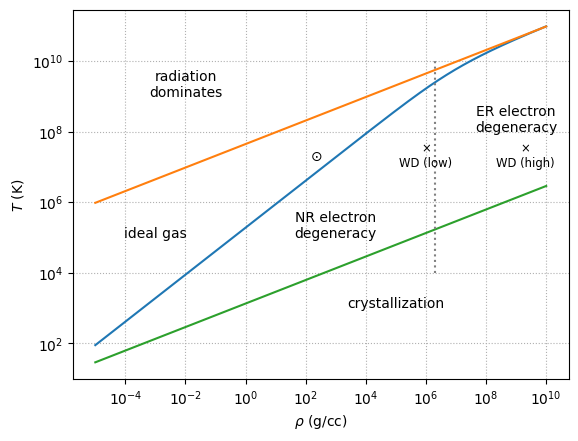

In [ ]:
rho = np.logspace(-5, 10, 2000)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(rho, deg_ideal(rho))
ax.plot(rho, rad_ideal(rho))
ax.plot(rho, crystallization(rho))

# NR vs ER degeneracy
ax.vlines(B*mu_e, 1.e4, 1.e10, color="0.5", ls=":")


ax.text(1.e-2, 1.e9, "radiation\ndominates", horizontalalignment="center")
ax.text(1.e-3, 1.e5, "ideal gas", horizontalalignment="center")
ax.text(1.e3, 1.e5, "NR electron\ndegeneracy", horizontalalignment="center")
ax.text(1.e9, 1.e8, "ER electron\ndegeneracy", horizontalalignment="center")
ax.text(1.e5, 1.e3, "crystallization", horizontalalignment="center")

ax.text(150, 1.5e7, "⊙")
ax.text(1.e6, 1.e7, r"$\times$"+"\nWD (low)", horizontalalignment="center", fontsize="small")
ax.text(2.e9, 1.e7, r"$\times$"+"\nWD (high)", horizontalalignment="center", fontsize="small")

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel(r"$\rho$ (g/cc)")
ax.set_ylabel("$T$ (K)")
ax.grid(ls=":")

## Plotting the boundaries + MESA

Here, produce the same plot but overlay the results of the 1M MESA stellar model history data from ICA4. 

To plot the results all on the same plot, you will need to match the size of rho to the number of points for MESA. 

One strategy would be to

1. load the MESA data using pandas, 
2. find the number of cells, 
3. then create a new rho array for use with the above functions that matches the size of the history central $\rho$ array.

In [ ]:
import pandas as pd
one_m_sun = pd.read_csv('data/M1_default_trimmed_history.data',sep=r'\s+',header=4)
one_m_sun.columns

Index(['model_number', 'star_age', 'star_mass', 'log_L', 'log_R', 'log_Teff',
       'log_center_T', 'log_center_Rho', 'log_center_P', 'center_h1',
       'center_he3', 'center_he4', 'center_c12', 'center_n14', 'center_o16',
       'center_ne20', 'center_mg24', 'center_si28', 'center_s32',
       'center_ar36', 'center_ca40', 'center_ti44', 'center_cr48',
       'center_fe52', 'center_fe54', 'center_fe56', 'center_ni56',
       'center_degeneracy', 'center_ye', 'center_entropy',
       'compactness_parameter', 'dynamic_timescale', 'kh_timescale',
       'nuc_timescale', 'pp', 'cno', 'tri_alfa', 'log_LH', 'log_LHe', 'log_LZ',
       'log_Lneu', 'he_core_mass', 'c_core_mass', 'o_core_mass',
       'si_core_mass', 'fe_core_mass', 'he_core_radius', 'c_core_radius',
       'o_core_radius', 'si_core_radius', 'fe_core_radius',
       'max_abs_v_velocity', 'surf_avg_omega_div_omega_crit',
       'log_total_angular_momentum', 'surf_avg_omega', 'surf_avg_v_rot',
       'star_mdot'],
      dtype=

In [ ]:
one_m_sun_rho = one_m_sun['log_center_Rho']
one_m_sun_T= one_m_sun['log_center_T']

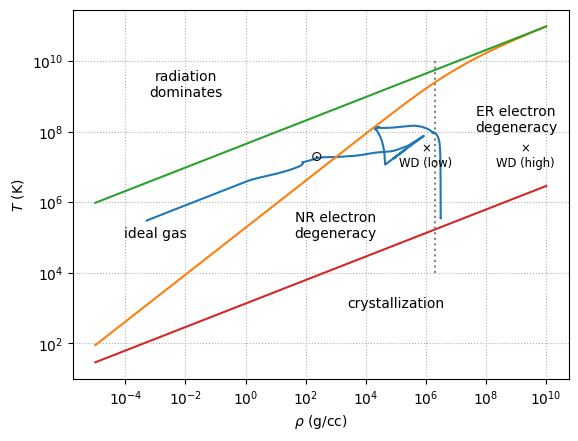

In [ ]:
rho = np.logspace(-5, 10, 2000)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(10**(one_m_sun_rho),10**(one_m_sun_T))
ax.plot(rho, deg_ideal(rho))
ax.plot(rho, rad_ideal(rho))
ax.plot(rho, crystallization(rho))

# NR vs ER degeneracy
ax.vlines(B*mu_e, 1.e4, 1.e10, color="0.5", ls=":")


ax.text(1.e-2, 1.e9, "radiation\ndominates", horizontalalignment="center")
ax.text(1.e-3, 1.e5, "ideal gas", horizontalalignment="center")
ax.text(1.e3, 1.e5, "NR electron\ndegeneracy", horizontalalignment="center")
ax.text(1.e9, 1.e8, "ER electron\ndegeneracy", horizontalalignment="center")
ax.text(1.e5, 1.e3, "crystallization", horizontalalignment="center")

ax.text(150, 1.5e7, "⊙")
ax.plot()
ax.text(1.e6, 1.e7, r"$\times$"+"\nWD (low)", horizontalalignment="center", fontsize="small")
ax.text(2.e9, 1.e7, r"$\times$"+"\nWD (high)", horizontalalignment="center", fontsize="small")

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel(r"$\rho$ (g/cc)")
ax.set_ylabel("$T$ (K)")
ax.grid(ls=":")

In [ ]:
one_m_sun_ms = pd.read_csv('data/M1_default_profile8.data',sep=r'\s+',header=4)
one_m_sun_ms.columns

Index(['mass', 'radius', 'luminosity', 'pressure', 'logRho', 'logT', 'energy',
       'entropy', 'cp', 'gamma1', 'grada', 'mu', 'free_e', 'ye', 'pgas',
       'prad', 'gradr', 'gradT', 'velocity', 'conv_vel', 'opacity', 'eps_nuc',
       'pp', 'cno', 'tri_alfa', 'eps_nuc_neu_total', 'non_nuc_neu', 'eps_grav',
       'h1', 'he3', 'he4', 'c12', 'n14', 'o16', 'ne20', 'mg24', 'si28', 's32',
       'ar36', 'ca40', 'ti44', 'cr48', 'fe52', 'fe54', 'fe56', 'ni56', 'eta',
       'log_omega', 'v_rot', 'j_rot', 'dynamo_log_B_r', 'dynamo_log_B_phi',
       'log_D_conv', 'log_D_semi', 'log_D_ovr', 'log_D_thrm'],
      dtype='object')

In [ ]:
one_m_sun_radius_ms = one_m_sun_ms['radius']
one_m_sun_density_ms = 10**(one_m_sun_ms['logRho'])

In [ ]:
one_m_sun_rhoc = max(one_m_sun_density_ms)
print(one_m_sun_rhoc)
rho_profile = one_m_sun_rhoc * (1-(one_m_sun_radius_ms/one_m_sun_radius_ms[0])**3)

154.2910716421559


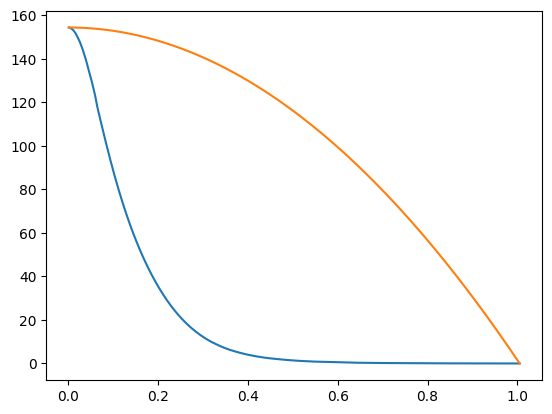

In [ ]:
plt.plot(one_m_sun_radius_ms,one_m_sun_density_ms)
plt.plot(one_m_sun_radius_ms,rho_profile)